In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import zipfile, requests, io
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip', stream=True)
zf = zipfile.ZipFile(io.BytesIO(r.content))
#df = pd.read_csv(zf.open('train.csv'), sep = ';')
df = pd.read_csv(zf.open('train.csv'))
#df = pd.read_csv('/home/jovyan/work/datasets/train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
# Here we turn into numpy arrays
X = df.iloc[:,:80].values
y = df.iloc[:,81].values

In [6]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
regr10 = KNeighborsRegressor(n_neighbors=10)

In [8]:
regr10.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [9]:
print("Test set R^2: {:.2f}".format(regr10.score(X_test, y_test)))

Test set R^2: 0.85


In [10]:
regr15 = KNeighborsRegressor(n_neighbors=15)
regr15.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(regr15.score(X_test, y_test)))

Test set R^2: 0.83


In [11]:
regr5 = KNeighborsRegressor(n_neighbors=5)
regr5.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(regr5.score(X_test, y_test)))

Test set R^2: 0.87


In [12]:
regr3 = KNeighborsRegressor(n_neighbors=3)
regr3.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(regr3.score(X_test, y_test)))

Test set R^2: 0.87


In [13]:
regr2 = KNeighborsRegressor(n_neighbors=2)
regr2.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(regr2.score(X_test, y_test)))

Test set R^2: 0.88


In [14]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lasso = Lasso().fit(X_train, y_train)
print("Training set score1: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score1: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used1: {}".format(np.sum(lasso.coef_ != 0)))

Training set score1: 0.72
Test set score1: 0.71
Number of features used1: 48


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913037.7294880361, tolerance: 1880.0097924087256
  positive)


In [15]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score001: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score001: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used001: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score001: 0.74
Test set score001: 0.72
Number of features used001: 75


In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score00001: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score00001: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used00001: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score00001: 0.74
Test set score00001: 0.73
Number of features used00001: 80


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462251.88413599366, tolerance: 1880.0097924087256
  positive)


In [17]:
lasso005 = Lasso(alpha=0.05, max_iter=100000).fit(X_train, y_train)
print("Training set score005: {:.2f}".format(lasso005.score(X_train, y_train)))
print("Test set score005: {:.2f}".format(lasso005.score(X_test, y_test)))
print("Number of features used005: {}".format(np.sum(lasso005.coef_ != 0)))

Training set score005: 0.73
Test set score005: 0.72
Number of features used005: 63


In [18]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score01: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score01: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used01: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score01: 0.73
Test set score01: 0.71
Number of features used01: 62


In [19]:
# lasso dataset

training_accuracy = []
test_accuracy = []

# record training set accuracy
training_accuracy.append("Training set score1")
training_accuracy.append("Training set score001")
training_accuracy.append("Training set score00001")
training_accuracy.append("Training set score005")
training_accuracy.append("Training set score01")
# record generalization accuracy
test_accuracy.append("Test set score1")
test_accuracy.append("Test set score001")
test_accuracy.append("Test set score00001")
test_accuracy.append("Test set score005")
test_accuracy.append("Test set score01")


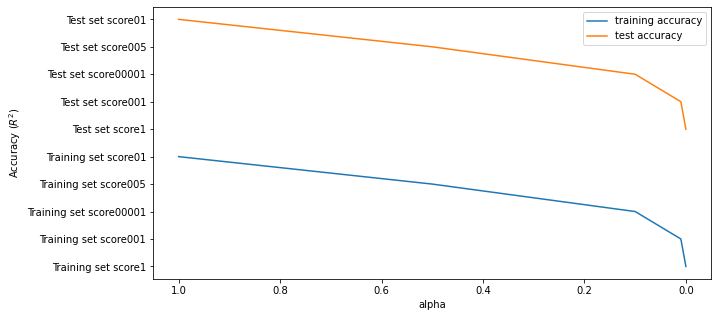

In [20]:
alphas = [0.0001, 0.01, 0.1, 0.5, 1]
plt.figure(figsize=(10,5))
plt.plot(alphas, training_accuracy, label="training accuracy")
plt.plot(alphas, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy ($R^2$)")
plt.xlabel("alpha")
plt.gca().invert_xaxis()
plt.legend()